## Dataset

In [1]:
from pandas import DataFrame, read_csv
import pandas as pd
import numpy as np

eksposur = pd.read_excel("Data.xlsx", sheet_name=0)
tonasi = pd.read_excel("Data.xlsx", sheet_name=1)
kode = pd.read_excel("Data.xlsx", sheet_name=2)

## Eksposur

In [2]:
eksposur.head()

,Jumlah Berita Label 0,Jumlah Berita Label 1,Jumlah Berita Label 2,Jumlah Berita Label 3,Jumlah Berita Label 4,Tanggal
0,24,877,41,65,159,2018-06-01
1,3,27,1,20,37,2018-06-02
2,3,0,2,5,11,2018-06-03
3,31,20,7,23,16,2018-06-04
4,98,18,1,154,20,2018-06-05


Keterangan
* Label 0 : Global Warning
* Label 1 : Penyebab Alami
* Label 2 : Perubahan Iklim
* Label 3 : Mitigasi
* Lebel 4 : Penyakit

In [3]:
eksposur.columns

Index(['Jumlah Berita Label 0', 'Jumlah Berita Label 1',
       'Jumlah Berita Label 2', 'Jumlah Berita Label 3',
       'Jumlah Berita Label 4', 'Tanggal'],
      dtype='object')

In [4]:
eksposur.describe()

,Jumlah Berita Label 0,Jumlah Berita Label 1,Jumlah Berita Label 2,Jumlah Berita Label 3,Jumlah Berita Label 4
count,137.000000,137.000000,137.000000,137.000000,137.000000
mean,58.372263,182.540146,33.306569,61.671533,122.233577
std,60.328391,503.557798,33.237019,52.700891,412.169355
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,11.000000,23.000000,12.000000
50%,46.000000,12.000000,21.000000,50.000000,30.000000
75%,69.000000,134.000000,48.000000,79.000000,67.000000
max,449.000000,4916.000000,190.000000,302.000000,3690.000000


In [5]:
eksposur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 6 columns):
Jumlah Berita Label 0    137 non-null int64
Jumlah Berita Label 1    137 non-null int64
Jumlah Berita Label 2    137 non-null int64
Jumlah Berita Label 3    137 non-null int64
Jumlah Berita Label 4    137 non-null int64
Tanggal                  137 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(5)
memory usage: 6.5 KB


Research Question
1. Faktor apa yang paling berpengaruh terhadap perubahan iklim di Indonesia?
2. Apakah perubahan iklim mempengaruhi penyakit?
3. Apa faktor yang paling berpengaruh dalam perubahan iklim yang dapat mempengaruhi timbulnya penyakit?
4. Apa jenis penyakit yang sering muncul akibat perubahan iklim?
5. Bagaimana prediksi pengaruh perubahan iklim terhadap penyakit?
6. Apa langkah yang sebaiknya dilakukan sebagai tindak lanjut dari hasil prediksi yang telah dilakukan?

## Pengecekan data yang hilang

Sebelum melakukan analisis data, dilakukan pengecekan data apakah terdapat missing value (data hilang) atau tidak. Data yang tidak lengkap akan menyebabkan akurasi analisis yang kurang baik.

In [6]:
total = eksposur.isnull().sum().sort_values(ascending = False)
percent = (eksposur.isnull().sum()/eksposur.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Tanggal,Jumlah Berita Label 4,Jumlah Berita Label 3,Jumlah Berita Label 2,Jumlah Berita Label 1,Jumlah Berita Label 0
Total,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0


Berdasarkan pengecekan yang telah dilakukan jelas bahwa data lengkap (tidak ada missing value)

## Plot Data

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

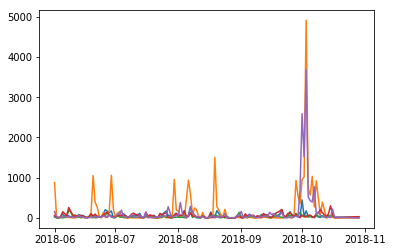

In [8]:
plt.plot(eksposur['Tanggal'], eksposur['Jumlah Berita Label 0'])
plt.plot(eksposur['Tanggal'], eksposur['Jumlah Berita Label 1'])
plt.plot(eksposur['Tanggal'], eksposur['Jumlah Berita Label 2'])
plt.plot(eksposur['Tanggal'], eksposur['Jumlah Berita Label 3'])
plt.plot(eksposur['Tanggal'], eksposur['Jumlah Berita Label 4'])

## Korelasi

Untuk melihat apakah variabel satu mempengaruhi variabel lain perlu dilihat korelasinya.

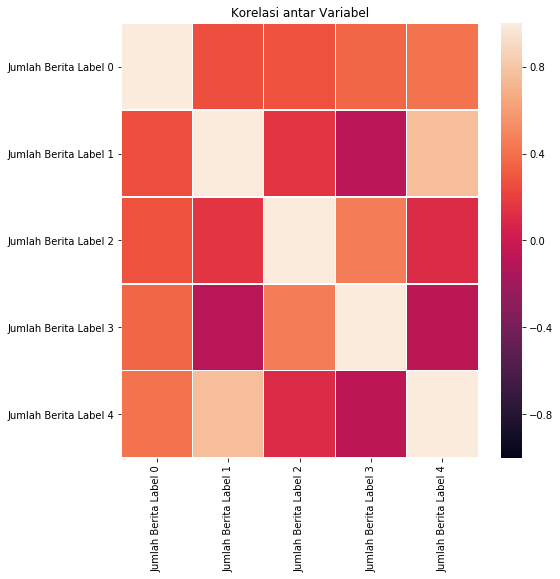

In [9]:
var = ['Jumlah Berita Label 0', 'Jumlah Berita Label 1', 'Jumlah Berita Label 2', 'Jumlah Berita Label 3', 'Jumlah Berita Label 4']

plt.figure(figsize = (8,8))
plt.title('Korelasi antar Variabel')
corr = eksposur[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

Berdasarkan plot korelasi nampak bahwa terdapat
1. Korelasi Tinggi Positif : Label 1 dengan label 4
2. Korelasi Rendah Positif : Label 0 dengan label 1, Label 0 dengan label 4, Label 1 dengan label 2, Label 2 dengan label 3
3. Tidak ada Korelasi      : - 
4. Korelasi Tinggi Negatif : -
5. Korelasi Rendah Negatif : Label 1 dengan label 3, Label 3 dengan label 4

In [10]:
eksposur.corr()

,Jumlah Berita Label 0,Jumlah Berita Label 1,Jumlah Berita Label 2,Jumlah Berita Label 3,Jumlah Berita Label 4
Jumlah Berita Label 0,1.000000,0.263155,0.279999,0.357179,0.410098
Jumlah Berita Label 1,0.263155,1.000000,0.152019,-0.087407,0.761291
Jumlah Berita Label 2,0.279999,0.152019,1.000000,0.454847,0.105151
Jumlah Berita Label 3,0.357179,-0.087407,0.454847,1.000000,-0.065686
Jumlah Berita Label 4,0.410098,0.761291,0.105151,-0.065686,1.000000


Sehingga yang dapat digunakan untuk analisis adalah
1. Variabe Target : Label 4, Variabel Predictor : Label 0, 1.

## Analisis Data Menggunakan Random Forest Classifier

In [12]:
import gc
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 100)

In [13]:
df = eksposur

In [14]:
RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier

#VALIDATION
VALID_SIZE = 0.20 # simple validation using train_test_split

#CROSS-VALIDATION
NUMBER_KFOLDS = 5 #number of KFolds for cross-validation

RANDOM_STATE = 2018

MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop 
OPT_ROUNDS = 1000  #To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 #Print out metric result

### Menentukan variabel prediktor dan variabel target

In [15]:
target = 'Jumlah Berita Label 4'
predictors = ['Jumlah Berita Label 1', 'Jumlah Berita Label 0']

### Split data pada train (data pelatihan) and validation set

In [16]:
train_df, val_df = train_test_split(df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True)

Buat salinan dari train_df dan val_df untuk digunakan nanti.

In [17]:
train_df_bkp = train_df.copy()
val_df_bkp = val_df.copy()

### Klasifikasi Random Forest

Jalankan model menggunakan data pelatihan untuk pelatihan. Kemudian melakukan validasi menggunakan set validasi.

Kriteria validasi GINI yang digunakan adalah GINI = 2 * (AUC) - 1, di mana AUC adalah Karakteristik Operasi Penerima - Area Under Curve (ROC-AUC). Jumlah estimator diatur ke 100 dan jumlah pekerjaan paralel diatur ke 4.

Langkah awal dilakukan inisialisasi RandomForestClassifier.

In [18]:
clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

Latih RandonForestClassifier menggunakan data train_df dan fit function.

In [19]:
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=False, random_state=2018, verbose=False,
            warm_start=False)

Prediksi nilai target untuk data val_df, menggunakan fungsi prediksi.

In [20]:
preds = clf.predict(val_df[predictors])

### Features importance

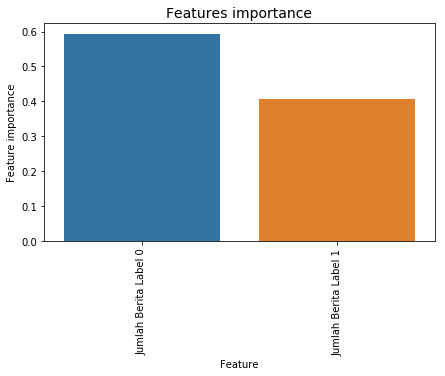

In [21]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

Features/variabel yang paling penting adalah Label 0.

### Confusion matrix

Confusion matrix adalah suatu metode yang biasanya digunakan untuk melakukan perhitungan akurasi pada konsep data mining.

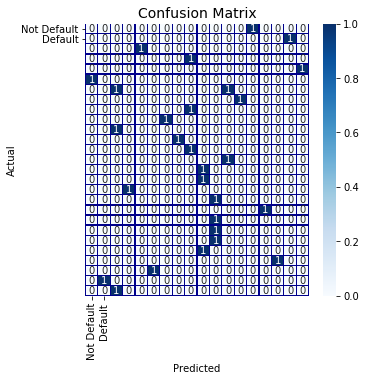

In [22]:
cm = pd.crosstab(val_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

Nampak bahwa banyak hasil prediksi yang salah, artinya klasifikasi random forest kurang baik digunakan.

In [ ]:
roc_auc_score(val_df[target].values, preds)

## Analisis Data Menggunakan Regresi

In [23]:
import scipy.stats as stats
from sklearn import linear_model

In [24]:
df.columns

Index(['Jumlah Berita Label 0', 'Jumlah Berita Label 1',
       'Jumlah Berita Label 2', 'Jumlah Berita Label 3',
       'Jumlah Berita Label 4', 'Tanggal'],
      dtype='object')

In [25]:
X = df['Jumlah Berita Label 4']
Y = df['Jumlah Berita Label 1']

X=X.values.reshape(len(X),1)
Y=Y.values.reshape(len(Y),1)

In [27]:
# Split data menjadi training/testing sets
X_train = X[:-100]
X_test = X[-37:]
 
# Split targets menjadi training/testing sets
Y_train = Y[:-100]
Y_test = Y[-37:]
X_train.shape

(37, 1)

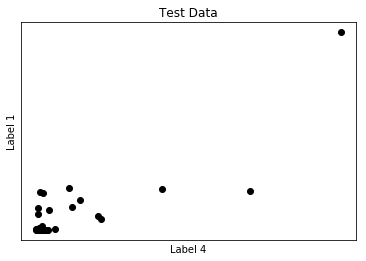

In [28]:
# Scatter plot
plt.scatter(X_test, Y_test,  color='black')
plt.title('Test Data')
plt.xlabel('Label 4')
plt.ylabel('Label 1')
plt.xticks(())
plt.yticks(())
 
plt.show()

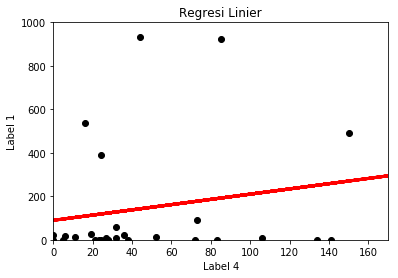

In [29]:
# Membuat obyek regresi linear
regr = linear_model.LinearRegression()
 
# Train model menggunakan training sets
regr.fit(X_train, Y_train)
 
# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.title('Regresi Linier')
plt.xlabel('Label 4')
plt.ylabel('Label 1')

plt.plot(X_test, regr.predict(X_test), color='red',linewidth=3)
plt.axis([0, 170, 0, 1000])
plt.show()

In [31]:
print(regr.predict(11))

[[102.84762977]]
